In [ ]:
import pandas as pd
from re import search
import plotly.express as px
import datetime
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
xls = pd.ExcelFile('OpenBarre_QUEST_cleaned.xlsx')
fb_page_reach = pd.read_excel(xls, 'FB Page Reach')
ig_page_reach = pd.read_excel(xls, 'IG Page Reach')
fb_page_visits = pd.read_excel(xls, 'FB Page Visits')
ig_prof_visits = pd.read_excel(xls, 'IG Profile Visits')
new_fb_likes = pd.read_excel(xls, 'New FB Likes')
new_ig_followers = pd.read_excel(xls, 'New IG Followers')
ads_content_insights = pd.read_excel(xls, 'Ads Content Insights')
fb_content_insights = pd.read_excel(xls, 'FB Content Insights')
ig_content_insights = pd.read_excel(xls, 'IG Content Insights')

In [ ]:
fb_content_insights['Post time'] = pd.to_datetime(fb_content_insights['Post time'], format="%Y-%m-%dT%H:%M:%S")
fb_content_insights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Caption              470 non-null    object        
 1   Post time            476 non-null    datetime64[ns]
 2   Reach                476 non-null    int64         
 3   Likes and reactions  476 non-null    int64         
 4   Sticker taps         0 non-null      float64       
 5   Replies              0 non-null      float64       
 6   Link clicks          476 non-null    int64         
 7   Comments             476 non-null    int64         
 8   Shares               476 non-null    int64         
 9   Results              0 non-null      float64       
 10  Cost per result      1 non-null      float64       
dtypes: datetime64[ns](1), float64(4), int64(5), object(1)
memory usage: 41.0+ KB


In [ ]:
def time_in_range(start, end, current):
    return start <= current < end


column_names = ["Time range", "Reach", "Likes and reactions", "Link clicks", "Comments", "Caption length"]
fb_content_insights_added = pd.DataFrame(columns = column_names)
fb_content_insights_added

for index, row in fb_content_insights.iterrows():
  curr_time = row['Post time'].time()
  if time_in_range(datetime.time(0, 0, 0), datetime.time(5, 59, 59), curr_time):
    fb_content_insights_added.loc[len(fb_content_insights_added.index)] = ['0-6', row['Reach'], row['Likes and reactions'], row['Link clicks'], row['Comments'], len(str(row['Caption']))]
  elif time_in_range(datetime.time(6, 0, 0), datetime.time(8, 59, 59), curr_time):
    fb_content_insights_added.loc[len(fb_content_insights_added.index)] = ['6-9', row['Reach'], row['Likes and reactions'], row['Link clicks'], row['Comments'], len(str(row['Caption']))]
  elif time_in_range(datetime.time(9, 0, 0), datetime.time(11, 59, 59), curr_time):
    fb_content_insights_added.loc[len(fb_content_insights_added.index)] = ['9-12', row['Reach'], row['Likes and reactions'], row['Link clicks'], row['Comments'], len(str(row['Caption']))]
  elif time_in_range(datetime.time(12, 0, 0), datetime.time(14, 59, 59), curr_time):
    fb_content_insights_added.loc[len(fb_content_insights_added.index)] = ['12-15', row['Reach'], row['Likes and reactions'], row['Link clicks'], row['Comments'], len(str(row['Caption']))]
  elif time_in_range(datetime.time(15, 0, 0), datetime.time(17, 59, 59), curr_time):
    fb_content_insights_added.loc[len(fb_content_insights_added.index)] = ['15-18', row['Reach'], row['Likes and reactions'], row['Link clicks'], row['Comments'], len(str(row['Caption']))]
  elif time_in_range(datetime.time(18, 0, 0), datetime.time(20, 59, 59), curr_time):
    fb_content_insights_added.loc[len(fb_content_insights_added.index)] = ['18-21', row['Reach'], row['Likes and reactions'], row['Link clicks'], row['Comments'], len(str(row['Caption']))]
  elif time_in_range(datetime.time(21, 0, 0), datetime.time(23, 59, 59), curr_time):
    fb_content_insights_added.loc[len(fb_content_insights_added.index)] = ['21-24', row['Reach'], row['Likes and reactions'], row['Link clicks'], row['Comments'], len(str(row['Caption']))]

fb_content_insights_added

,Time range,Reach,Likes and reactions,Link clicks,Comments,Caption length
0,12-15,98,1,0,0,293
1,18-21,910,11,15,0,3059
2,12-15,125,3,18,0,740
3,12-15,286,13,9,1,373
4,6-9,948,7,16,4,908
...,...,...,...,...,...,...
471,6-9,509,84,189,8,147
472,6-9,0,5,0,0,191
473,15-18,0,0,0,0,68
474,9-12,0,5,0,0,424


In [ ]:
def time_in_range(start, end, current):
    return start <= current < end


column_names = ["Reach", "Likes and reactions", "Link clicks", "Comments", "Caption length"]
fb_content_insights_added = pd.DataFrame(columns = column_names, dtype=int)
fb_content_insights_added

for index, row in fb_content_insights.iterrows():
  curr_time = row['Post time'].time()
  if time_in_range(datetime.time(0, 0, 0), datetime.time(5, 59, 59), curr_time):
    fb_content_insights_added.loc[len(fb_content_insights_added.index)] = [row['Reach'], row['Likes and reactions'], row['Link clicks'], row['Comments'], len(str(row['Caption']))]
  elif time_in_range(datetime.time(6, 0, 0), datetime.time(8, 59, 59), curr_time):
    fb_content_insights_added.loc[len(fb_content_insights_added.index)] = [row['Reach'], row['Likes and reactions'], row['Link clicks'], row['Comments'], len(str(row['Caption']))]
  elif time_in_range(datetime.time(9, 0, 0), datetime.time(11, 59, 59), curr_time):
    fb_content_insights_added.loc[len(fb_content_insights_added.index)] = [row['Reach'], row['Likes and reactions'], row['Link clicks'], row['Comments'], len(str(row['Caption']))]
  elif time_in_range(datetime.time(12, 0, 0), datetime.time(14, 59, 59), curr_time):
    fb_content_insights_added.loc[len(fb_content_insights_added.index)] = [row['Reach'], row['Likes and reactions'], row['Link clicks'], row['Comments'], len(str(row['Caption']))]
  elif time_in_range(datetime.time(15, 0, 0), datetime.time(17, 59, 59), curr_time):
    fb_content_insights_added.loc[len(fb_content_insights_added.index)] = [row['Reach'], row['Likes and reactions'], row['Link clicks'], row['Comments'], len(str(row['Caption']))]
  elif time_in_range(datetime.time(18, 0, 0), datetime.time(20, 59, 59), curr_time):
    fb_content_insights_added.loc[len(fb_content_insights_added.index)] = [row['Reach'], row['Likes and reactions'], row['Link clicks'], row['Comments'], len(str(row['Caption']))]
  elif time_in_range(datetime.time(21, 0, 0), datetime.time(23, 59, 59), curr_time):
    fb_content_insights_added.loc[len(fb_content_insights_added.index)] = [row['Reach'], row['Likes and reactions'], row['Link clicks'], row['Comments'], len(str(row['Caption']))]

fb_content_insights_added.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 476 entries, 0 to 475
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Reach                476 non-null    int64
 1   Likes and reactions  476 non-null    int64
 2   Link clicks          476 non-null    int64
 3   Comments             476 non-null    int64
 4   Caption length       476 non-null    int64
dtypes: int64(5)
memory usage: 22.3 KB


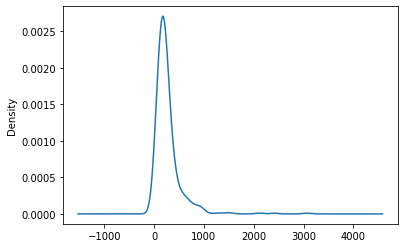

In [ ]:
fb_content_insights_added['Caption length'].plot.kde()

fb_content_insights_added['ln_Caption length'] = np.log(fb_content_insights_added['Caption length'] + 1)
fb_content_insights_added['ln_Reach'] = np.log(fb_content_insights_added['Reach'] + 1)
fb_content_insights_added['ln_Likes and reactions'] = np.log(fb_content_insights_added['Likes and reactions'] + 1)
fb_content_insights_added['ln_Link clicks'] = np.log(fb_content_insights_added['Link clicks'] + 1)

In [ ]:
# Caption length vs Reach
YVar = fb_content_insights_added[['Reach']]
XVar = fb_content_insights_added[['Caption length']]
XVar = sm.add_constant(XVar)
LinearModel = sm.OLS(YVar, XVar, missing='drop').fit()
print(LinearModel.summary())

                            OLS Regression Results                            
Dep. Variable:                  Reach   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     12.72
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           0.000399
Time:                        19:35:50   Log-Likelihood:                -3306.7
No. Observations:                 476   AIC:                             6617.
Df Residuals:                     474   BIC:                             6626.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            117.4874     16.068      7.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# Caption length vs Likes and reactions
YVar = fb_content_insights_added[['Likes and reactions']]
XVar = fb_content_insights_added[['Caption length']]
XVar = sm.add_constant(XVar)
LinearModel = sm.OLS(YVar, XVar, missing='drop').fit()
print(LinearModel.summary())

                             OLS Regression Results                            
Dep. Variable:     Likes and reactions   R-squared:                       0.004
Model:                             OLS   Adj. R-squared:                  0.002
Method:                  Least Squares   F-statistic:                     1.975
Date:                 Fri, 22 Apr 2022   Prob (F-statistic):              0.161
Time:                         19:36:13   Log-Likelihood:                -1973.4
No. Observations:                  476   AIC:                             3951.
Df Residuals:                      474   BIC:                             3959.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.0181

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# Caption length vs Link clicks
YVar = fb_content_insights_added[['Link clicks']]
XVar = fb_content_insights_added[['Caption length']]
XVar = sm.add_constant(XVar)
LinearModel = sm.OLS(YVar, XVar, missing='drop').fit()
print(LinearModel.summary())

                            OLS Regression Results                            
Dep. Variable:            Link clicks   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.382
Date:                Mon, 04 Apr 2022   Prob (F-statistic):              0.123
Time:                        15:06:32   Log-Likelihood:                -2240.4
No. Observations:                 476   AIC:                             4485.
Df Residuals:                     474   BIC:                             4493.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              9.9078      1.710      5.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


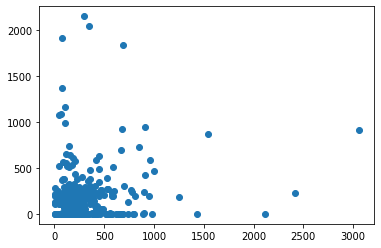

In [ ]:
plt.scatter(fb_content_insights_added['Caption length'], fb_content_insights_added['Reach'])

In [ ]:
# Only slight correlation between caption length and reach, the rest are even weaker
# try to figure out if we can get geo data
# try to find a way to check if a post was a single pic or multiple